In [1]:
import numpy as np  
import matplotlib.pyplot as plt

train_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train'
validation_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation'
train_cats_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Cat'
train_dogs_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/train/Dog'
validation_cats_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Cat'
validation_dogs_dir = '/content/drive/MyDrive/All-datasets/cats_and_dogs_small/validation/Dog'

In [2]:
num_cats_tr = len(train_cats_dir)
num_dogs_tr = len(train_dogs_dir)
num_cats_val = len(validation_cats_dir)
num_dogs_val = len(validation_dogs_dir)

In [4]:
total_train = num_cats_tr + num_dogs_tr
total_validation = num_cats_val + num_dogs_val

In [5]:
print('total training cat image', num_cats_tr)
print('total training dog image', num_dogs_tr)
print('total validation cat image', num_cats_val)
print('total validation dog image', num_dogs_val)

total training cat image 65
total training dog image 65
total validation cat image 70
total validation dog image 70


In [6]:
print('total training images', total_train)
print('total validation images', total_validation)

total training images 130
total validation images 140


In [7]:
BATCH_SIZE = 100
IMG_SHAPE = 150

In [8]:
from keras.preprocessing.image import ImageDataGenerator

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=validation_dir,
                                                              shuffle=True,
                                                              target_size=(IMG_SHAPE, IMG_SHAPE),
                                                              class_mode='binary')

Found 198 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [11]:
sample_training_images, _= next(train_data_gen)

In [12]:
def plot_imagess(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

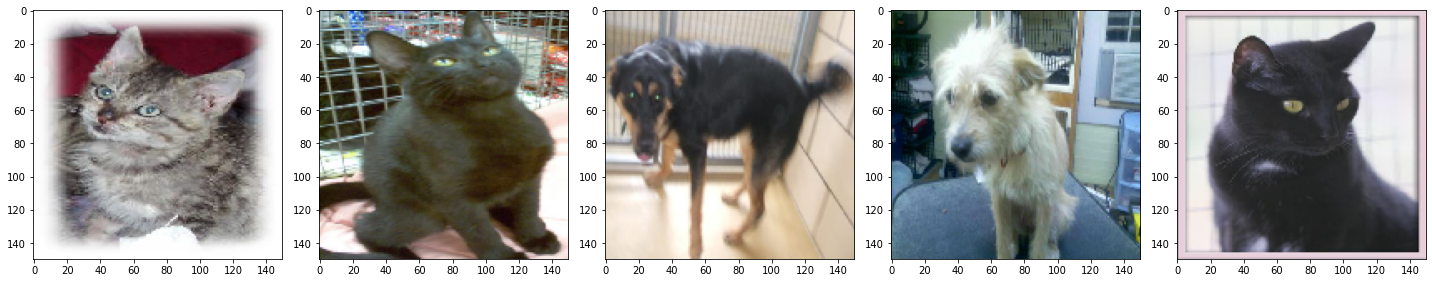

In [13]:
plot_imagess(sample_training_images[:5])

In [15]:
from tensorflow.keras import layers
from tensorflow.keras import models


model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [18]:
EPOCHS = 100

In [19]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(total_train/float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/100
2/2 [==============================] - 102s 51s/step - loss: 0.0000e+00 - accuracy: 0.5657 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 3/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 5/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 6/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 8/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 9/100
2/2 [==============================] - 7s 3s/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 10/100
2/2 [==============================] -

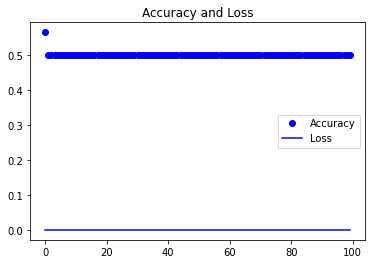

In [20]:
accuracy = history.history['accuracy']
loss = history.history['loss']


epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy')
plt.plot(epochs, loss, 'b', label='Loss')
plt.title('Accuracy and Loss')
plt.legend()


plt.show()